In [1]:
from Dataset import Preprocessing
from Model.mnb import MultinomialNaiveBayes
from Utils.utils import *

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DEBUG = True

In [2]:
data_processing = Preprocessing()
reviews_df, wines_df, users_df, full_df = data_processing.get_dataset()

Reading data...
Cleaning data...
Tokenizing data...
Creating labels...


C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:24: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.full_df = pd.read_csv(path + "\\full_dataset.csv")
C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:37: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  no_html = BeautifulSoup(text).get_text()
C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The

In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636956 entries, 0 to 1636955
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1636956 non-null  object 
 1   Year         1595987 non-null  object 
 2   Wine ID      1636956 non-null  int64  
 3   User Rating  1636956 non-null  float64
 4   Note         1636946 non-null  object 
 5   CreatedAt    1636956 non-null  object 
 6   User         1636946 non-null  object 
 7   Winery       1636956 non-null  object 
 8   Rating       1636956 non-null  float64
 9   Country      1636956 non-null  object 
 10  Region       1635823 non-null  object 
 11  Price        1636956 non-null  float64
 12  Cleaned      1636956 non-null  object 
 13  Tokenized    1636956 non-null  object 
 14  Sentiment    1636956 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 187.3+ MB


In [4]:
reviews_df.info(), wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630246 entries, 0 to 1630245
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1630246 non-null  object 
 1   Year         1589277 non-null  object 
 2   Wine ID      1630246 non-null  int64  
 3   User Rating  1630246 non-null  float64
 4   Note         1630236 non-null  object 
 5   CreatedAt    1630246 non-null  object 
 6   User         1630236 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 87.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      1798 non-null   object 
 1   Year        1794 non-null   object 
 2   Wine ID     1798 non-null   int64  
 3   Wine        1798 non-null   object 
 4   Rating      1798 non-null   float64
 5   num_review  1798 non-null   int

(None, None)

In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49297 entries, 0 to 49296
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     49297 non-null  object
 1   Bio      8886 non-null   object
 2   Country  49297 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


Data Visualization

<AxesSubplot: >

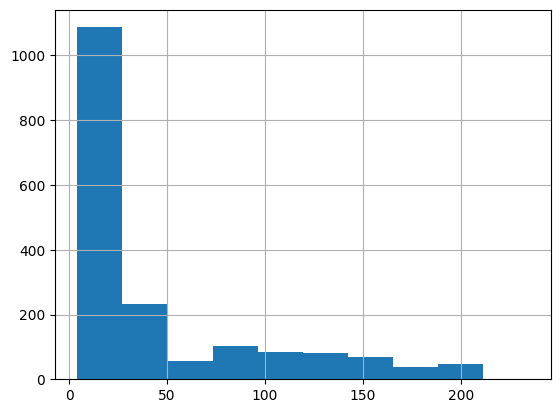

In [6]:
wines_df['Price'].hist()


<AxesSubplot: ylabel='Wine'>

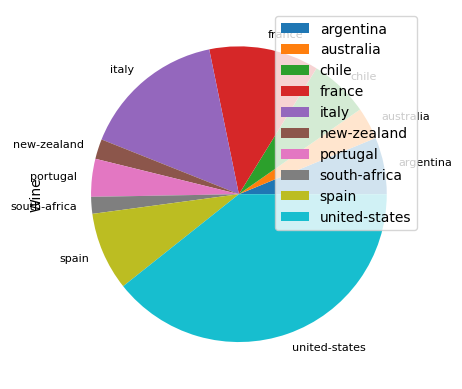

In [7]:
wines_df.groupby(['Country']).count()[wines_df.groupby(['Country']).count()['Wine']>20].plot(kind='pie', y='Wine',fontsize=8)


<AxesSubplot: >

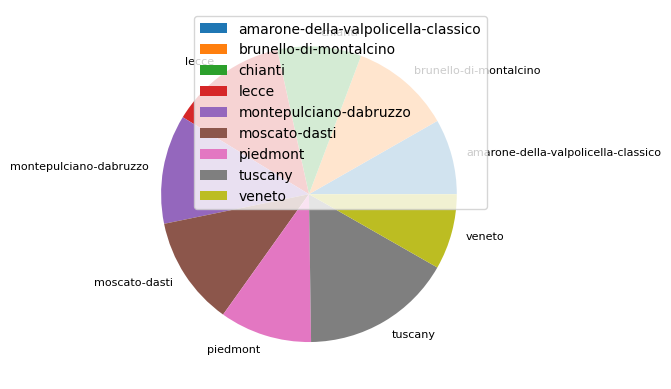

In [8]:
geo_area_it = wines_df[wines_df['Country']=='italy'].groupby(['Region']).count()

geo_area_it[geo_area_it['Wine']>8].plot(kind='pie', y='Wine',fontsize=8,label="")

<AxesSubplot: ylabel='User'>

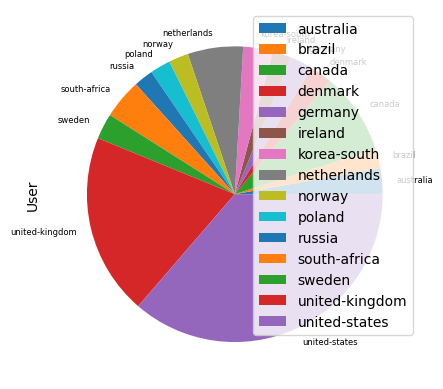

In [9]:
users_df.groupby(['Country']).count()[users_df.groupby(['Country']).count()['User']>700].plot(kind='pie', y='User', fontsize=6,rot=20)


Rating distribution - Sentiment

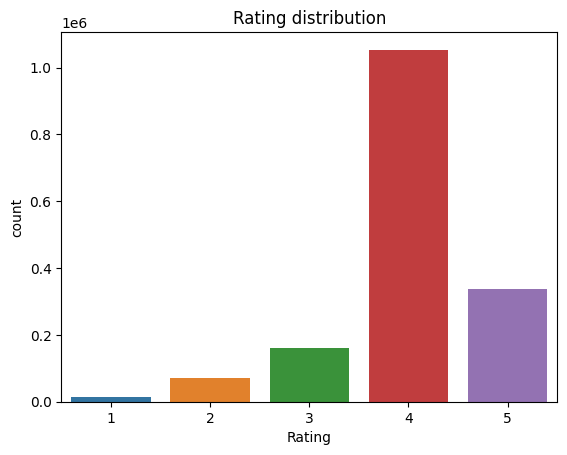

In [11]:
full_df["int_Rating"] = full_df["User Rating"].apply(round)

f = sns.countplot(x='int_Rating', data=full_df)
f.set_title("Rating distribution")
plt.xlabel("Rating");

In [4]:
neg = full_df[full_df["User Rating"]<4].Wine.count()
pos = full_df[full_df["User Rating"]>4].Wine.count()
neutr = pos = full_df[full_df["User Rating"]==4].Wine.count()

neg, neutr,pos

(450167, 543151, 543151)

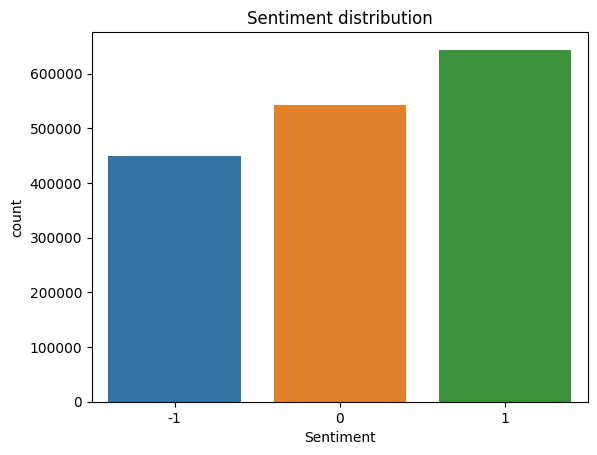

In [5]:

f = sns.countplot(x='Sentiment', data=full_df)
f.set_title("Sentiment distribution")
plt.xlabel("Sentiment");


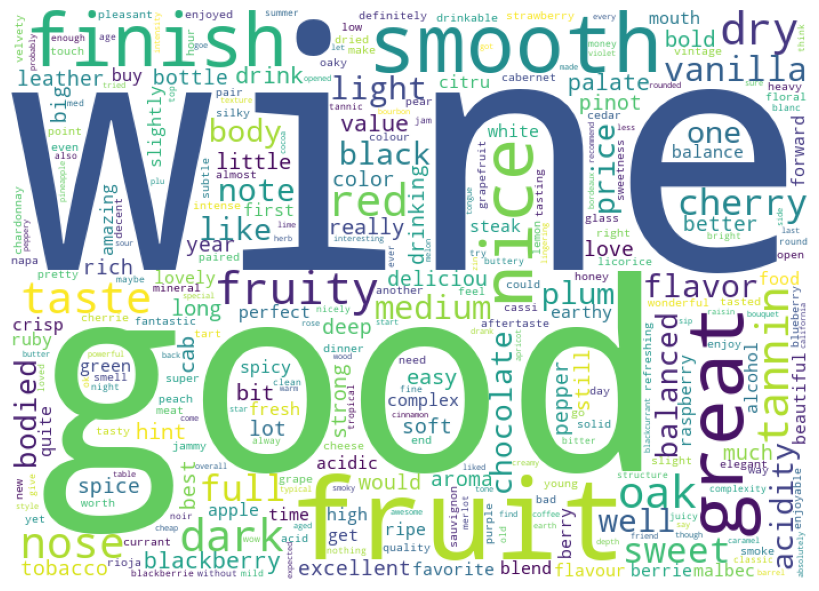

In [6]:
plot_wordcloud(full_df["Cleaned"])

In [ ]:
from sklearn.model_selection import train_test_split

X, y = full_df['Tokenized'], full_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [65]:
from sklearn.utils import resample
def balance_df(df):
    neg = df[df.Sentiment == -1]
    neu = df[df.Sentiment == 0]
    pos = df[df.Sentiment == 1]
    pos_downsampled = resample(pos,
                               replace=False,
                               n_samples=len(neg))
    neu_downsampled = resample(neu,
                               replace=False,
                               n_samples=len(neg))

    return pd.concat([neu_downsampled, neg, pos_downsampled])

downsampled_df = balance_df(full_df)

In [67]:
X, y = downsampled_df['Tokenized'], downsampled_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [68]:
MNB = MultinomialNaiveBayes(
    classes=np.unique(np.array([-1,0,1]))
).fit(X_train.values, y_train.values)

In [69]:
y_hat = MNB.predict(X_test.values)

In [70]:
acc = np.sum(np.equal(y_test.values, y_hat)) / len(y_test)
acc

0.5605194112812261

In [71]:
class_report(y_test,y_hat)

              precision    recall  f1-score   support

          -1       0.62      0.64      0.63    135050
           0       0.46      0.38      0.42    135050
           1       0.58      0.66      0.62    135051

    accuracy                           0.56    405151
   macro avg       0.55      0.56      0.55    405151
weighted avg       0.55      0.56      0.55    405151



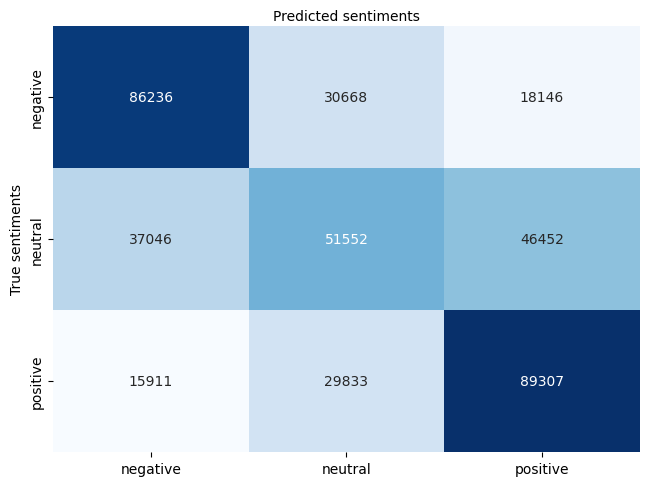

In [72]:
cnf_matrix(y_test,y_hat)


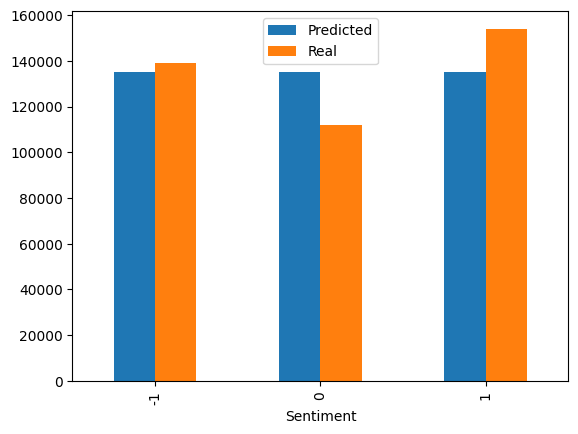

In [73]:
plot_sentiment_pred(y_hat,y_test)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(full_df['Tokenized'].astype("U"))

In [33]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [34]:
full_df['cluster'] = model.labels_

In [35]:
clusters = full_df.groupby('cluster')

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :15]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 smooth
 fruity
 finish
 nice
 dry
 delicious
 easy
 wine
 bold
 bodied
 good
 sweet
 taste
 light
 rich
------------
Cluster 1:
 good
 value
 wine
 price
 fruity
 dry
 taste
 sweet
 really
 nice
 light
 body
 flavor
 pretty
 red
------------
Cluster 2:
 oak
 cherry
 dark
 fruit
 vanilla
 blackberry
 plum
 black
 chocolate
 medium
 finish
 red
 tannins
 nose
 leather
------------
Cluster 3:
 great
 wine
 value
 price
 smooth
 taste
 fruity
 finish
 flavor
 good
 dry
 body
 nice
 fruit
 steak
------------
Cluster 4:
 wine
 fruity
 sweet
 nice
 dry
 light
 taste
 like
 best
 easy
 drink
 finish
 price
 fruit
 little
------------


C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
Y = vectorizer.transform(["my wine was very good, drink with friend"])
prediction = model.predict(Y)
print(prediction)

[14]


In [40]:
full_df[full_df.cluster==0].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,cluster
Sentiment,,,,,,,,,,,,,,,
-1,17189,16678,17189,17189,17189,17189,17189,17189,17189,17189,17176,17189,17189,17189,17189
0,45460,43458,45460,45460,45460,45460,45460,45460,45460,45460,45439,45460,45460,45460,45460
1,64212,61741,64212,64212,64212,64212,64212,64212,64212,64212,64200,64212,64212,64212,64212


In [41]:
full_df[full_df.cluster==1].groupby(by="Sentiment").count()


,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,cluster
Sentiment,,,,,,,,,,,,,,,
-1,48360,47438,48360,48360,48360,48360,48360,48360,48360,48360,48313,48360,48360,48360,48360
0,55369,53673,55369,55369,55369,55369,55369,55369,55369,55369,55332,55369,55369,55369,55369
1,32091,30990,32091,32091,32091,32091,32091,32091,32091,32091,32077,32091,32091,32091,32091


In [42]:
full_df[full_df.cluster==2].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,cluster
Sentiment,,,,,,,,,,,,,,,
-1,63979,62946,63979,63979,63979,63979,63979,63979,63979,63979,63945,63979,63979,63979,63979
0,93496,91772,93496,93496,93496,93496,93496,93496,93496,93496,93486,93496,93496,93496,93496
1,113418,112243,113418,113418,113418,113418,113418,113418,113418,113418,113411,113418,113418,113418,113418


In [43]:
full_df[full_df.cluster==3].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,cluster
Sentiment,,,,,,,,,,,,,,,
-1,19644,19217,19644,19644,19644,19644,19644,19644,19644,19644,19619,19644,19644,19644,19644
0,51570,49945,51570,51570,51570,51570,51570,51570,51570,51570,51530,51570,51570,51570,51570
1,60684,58805,60684,60684,60684,60684,60684,60684,60684,60684,60658,60684,60684,60684,60684


In [44]:
full_df[full_df.cluster==4].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,cluster
Sentiment,,,,,,,,,,,,,,,
-1,300995,294163,300995,300995,300986,300995,300986,300995,300995,300995,300515,300995,300995,300995,300995
0,297256,288900,297256,297256,297255,297256,297255,297256,297256,297256,297058,297256,297256,297256,297256
1,373233,364018,373233,373233,373233,373233,373233,373233,373233,373233,373064,373233,373233,373233,373233
